# Report

## 0. imports

In [1]:
from reportlab.lib.pagesizes import LETTER
from reportlab.pdfgen import canvas
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Table, TableStyle
from reportlab.lib import colors
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.enums import TA_LEFT
import mne

from utils import *
from eeg import compute_eeg_pipeline, test_eeg_pipeline


subject = "P5029423"
xdf_filename = f'/Users/bryan.gonzalez/CUNY_subs/sub-{subject}/sub-{subject}_ses-S001_task-CUNY_run-001_mobi.xdf'


## 1. Set up Document

In [2]:


# Set up the document
doc = SimpleDocTemplate("example_report.pdf", pagesize=LETTER)
styles = getSampleStyleSheet()
story = []

# Add a title
title = Paragraph(f"Subject Report: {subject}", styles["Title"])
story.append(title)
story.append(Spacer(1, 20))

# Add a paragraph
text = f"""
Collection Date: {get_collection_date(xdf_filename)} 
"""
paragraph = Paragraph(text, styles["BodyText"])
story.append(paragraph)
story.append(Spacer(1, 20))


# Add a table
data = [
    ["Item", "Quantity"],
    ["Oranges", 3],
    ["Bananas", 6]
]

table = Table(data, 
              hAlign='LEFT',)
table.setStyle(TableStyle([
    ('BACKGROUND', (0, 0), (-1, 0), colors.grey),
    ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
    ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
    ('GRID', (0,0), (-1,-1), 1, colors.white),
    ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
]))
#story.append(table)




2025-04-11 13:21:45,720 - pyxdf.pyxdf - INFO - Importing XDF file /Users/bryan.gonzalez/CUNY_subs/sub-P5029423/sub-P5029423_ses-S001_task-CUNY_run-001_mobi.xdf...
2025-04-11 13:21:49,171 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2025-04-11 13:21:49,192 - pyxdf.pyxdf - INFO -   performing jitter removal...


In [3]:
# Add a subtitle
subtitle = Paragraph(f"EEG", styles["Heading2"], )
story.append(subtitle)
story.append(Spacer(1, 5))

# Add a paragraph
text = f"""
Data preprocessed by performing <b>line noise removal</b>, <b>robust referencing</b>, and <b>bad channel detection/interpolation</b> using PyPrep pipeline. First, the pipeline applies a notch filter at 60 Hz and its harmonics to remove power line noise. Then, it performs <b>robust average referencing</b>, where it detects bad channels, interpolates them using surrounding signals, and computes a median-based reference across EEG channels. This ensures a stable reference even in the presence of noisy electrodes. The final output is a cleaned EEG dataset with a consistent reference, ready for further analysis.
"""

paragraph = Paragraph(text, styles["BodyText"], )
story.append(paragraph)
story.append(Spacer(1, 20))

## Computer the EEG variables (will take time)

2025-04-11 13:21:49,208 - pyxdf.pyxdf - INFO - Importing XDF file /Users/bryan.gonzalez/CUNY_subs/sub-P5029423/sub-P5029423_ses-S001_task-CUNY_run-001_mobi.xdf...
2025-04-11 13:21:52,133 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2025-04-11 13:21:52,164 - pyxdf.pyxdf - INFO -   performing jitter removal...
2025-04-11 13:21:52,282 - pyxdf.pyxdf - INFO - Importing XDF file /Users/bryan.gonzalez/CUNY_subs/sub-P5029423/sub-P5029423_ses-S001_task-CUNY_run-001_mobi.xdf...
2025-04-11 13:21:52,948 - pyxdf.pyxdf - INFO -   performing clock synchronization...
2025-04-11 13:21:52,971 - pyxdf.pyxdf - INFO -   performing jitter removal...


Creating RawArray with float64 data, n_channels=128, n_times=299995
    Range : 0 ... 299994 =      0.000 ...   300.004 secs
Ready.
Creating RawArray with float64 data, n_channels=1, n_times=299995
    Range : 0 ... 299994 =      0.000 ...   300.004 secs
Ready.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s


Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.5s


Removed notch frequencies (Hz):
     60.00 : 7482 windows
    120.00 : 7482 windows
    180.00 : 7482 windows
    239.00 : 7482 windows
    240.00 : 7482 windows
    241.00 : 7482 windows
    299.00 : 7482 windows
    300.00 : 7482 windows
    301.00 : 7482 windows
    359.00 : 7482 windows
    360.00 : 7482 windows
    361.00 : 7482 windows
    419.00 : 7482 windows
    420.00 : 7482 windows
    421.00 : 7482 windows
    479.00 : 7482 windows
    480.00 : 7482 windows
    481.00 : 7482 windows
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...
Finding optimal chunk size : 43
Total # of chunks: 3
Current chunk:
1
2
3

RANSAC done!


2025-04-11 13:25:07,657 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': ['Cz'], 'bad_by_deviation': [], 'bad_by_hf_noise': ['E74', 'E76', 'E77', 'E81', 'E82', 'E83', 'E84', 'E88', 'E89', 'E90', 'E94', 'E95'], 'bad_by_correlation': ['E128'], 'bad_by_SNR': [], 'bad_by_dropout': [], 'bad_by_ransac': [np.str_('E7'), np.str_('E106'), np.str_('E126')], 'bad_all': ['Cz', 'E88', 'E77', 'E95', 'E128', 'E76', 'E82', 'E81', 'E74', 'E90', 'E84', np.str_('E126'), np.str_('E7'), 'E89', 'E94', 'E83', np.str_('E106')]}


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...
Finding optimal chunk size : 42
Total # of chunks: 3
Current chunk:
1
2
3

RANSAC done!


2025-04-11 13:26:43,850 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': ['Cz'], 'bad_by_deviation': ['E25', 'E88', 'E128', 'E8'], 'bad_by_hf_noise': ['E88', 'E77', 'E81', 'E74', 'E90', 'E84', 'E89', 'E94', 'E95'], 'bad_by_correlation': ['E88', 'E128'], 'bad_by_SNR': ['E88'], 'bad_by_dropout': [], 'bad_by_ransac': [np.str_('E127'), np.str_('E119'), np.str_('E126'), np.str_('E63')], 'bad_all': ['Cz', np.str_('E127'), 'E88', 'E77', 'E128', np.str_('E119'), 'E8', 'E81', 'E74', 'E25', 'E90', 'E84', np.str_('E126'), 'E89', 'E94', 'E95', np.str_('E63')]}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.0 mm
Computing interpolation matrix from 112 sensor positions
Interpolating 17 sensors


2025-04-11 13:26:44,501 - pyprep.reference - INFO - Iterations: 1


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...
Finding optimal chunk size : 42
Total # of chunks: 3
Current chunk:
1
2
3

RANSAC done!


2025-04-11 13:27:34,401 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': ['Cz'], 'bad_by_deviation': ['E25', 'E88', 'E8', 'E128'], 'bad_by_hf_noise': ['E88', 'E77', 'E81', 'E74', 'E90', 'E84', 'E89', 'E94', 'E95'], 'bad_by_correlation': ['E88', 'E128'], 'bad_by_SNR': ['E88'], 'bad_by_dropout': [], 'bad_by_ransac': [np.str_('E127'), np.str_('E119'), np.str_('E126'), np.str_('E63')], 'bad_all': ['Cz', np.str_('E127'), 'E88', 'E77', 'E128', np.str_('E119'), 'E8', 'E81', 'E74', 'E25', 'E90', 'E84', np.str_('E126'), 'E89', 'E94', 'E95', np.str_('E63')]}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.0 mm
Computing interpolation matrix from 112 sensor positions
Interpolating 17 sensors


2025-04-11 13:27:35,050 - pyprep.reference - INFO - Iterations: 2


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...
Finding optimal chunk size : 42
Total # of chunks: 3
Current chunk:
1
2
3

RANSAC done!


2025-04-11 13:28:26,612 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': ['Cz'], 'bad_by_deviation': ['E25', 'E88', 'E128', 'E8'], 'bad_by_hf_noise': ['E88', 'E77', 'E81', 'E74', 'E90', 'E84', 'E89', 'E94', 'E95'], 'bad_by_correlation': ['E88', 'E128'], 'bad_by_SNR': ['E88'], 'bad_by_dropout': [], 'bad_by_ransac': [np.str_('E127'), np.str_('E119'), np.str_('E1'), np.str_('E126'), np.str_('E63')], 'bad_all': ['Cz', np.str_('E127'), 'E88', 'E77', 'E128', np.str_('E119'), np.str_('E1'), 'E8', 'E81', 'E74', 'E25', 'E90', 'E84', np.str_('E126'), 'E89', 'E94', 'E95', np.str_('E63')]}


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.0 mm
Computing interpolation matrix from 111 sensor positions
Interpolating 18 sensors


2025-04-11 13:28:27,243 - pyprep.reference - INFO - Iterations: 3


NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Executing RANSAC
This may take a while, so be patient...
Finding optimal chunk size : 42
Total # of chunks: 3
Current chunk:
1
2
3

RANSAC done!


2025-04-11 13:29:14,777 - pyprep.reference - INFO - Bad channels: {'bad_by_nan': [], 'bad_by_flat': ['Cz'], 'bad_by_deviation': ['E25', 'E88', 'E8', 'E128'], 'bad_by_hf_noise': ['E88', 'E77', 'E81', 'E74', 'E90', 'E84', 'E89', 'E94', 'E95'], 'bad_by_correlation': ['E88', 'E128'], 'bad_by_SNR': ['E88'], 'bad_by_dropout': [], 'bad_by_ransac': [np.str_('E127'), np.str_('E119'), np.str_('E1'), np.str_('E126'), np.str_('E63')], 'bad_all': ['Cz', np.str_('E127'), 'E88', 'E77', 'E128', np.str_('E119'), np.str_('E1'), 'E8', 'E81', 'E74', 'E25', 'E90', 'E84', np.str_('E126'), 'E89', 'E94', 'E95', np.str_('E63')]}
2025-04-11 13:29:14,778 - pyprep.reference - INFO - Robust reference done


Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.0 mm
Computing interpolation matrix from 111 sensor positions
Interpolating 18 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s


Executing RANSAC
This may take a while, so be patient...
Finding optimal chunk size : 63
Total # of chunks: 2
Current chunk:
1
2

RANSAC done!
Found 14 uniquely bad channels:

0 by NaN: []

0 by flat: []

4 by deviation: ['E8', 'E25', 'E88', 'E128']

9 by HF noise: ['E74', 'E77', 'E81', 'E84', 'E88', 'E89', 'E90', 'E94', 'E95']

2 by correlation: ['E88', 'E128']

1 by SNR: ['E88']

0 by dropout: []

2 by RANSAC: [np.str_('E1'), np.str_('E126')]

Setting channel interpolation method to {'eeg': 'spline'}.
Interpolating bad channels.
    Automatic origin fit: head of radius 94.0 mm
Computing interpolation matrix from 114 sensor positions
Interpolating 15 sensors
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband at

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s


Executing RANSAC
This may take a while, so be patient...
Finding optimal chunk size : 64
Total # of chunks: 2
Current chunk:
1
2

RANSAC done!
Bad channels before robust reference: ['Cz', 'E88', 'E77', 'E95', 'E128', 'E76', 'E82', 'E81', 'E74', 'E90', 'E84', np.str_('E126'), np.str_('E7'), 'E89', 'E94', 'E83', np.str_('E106')]
Interpolated channels: ['Cz', 'E88', 'E77', 'E128', np.str_('E1'), 'E8', 'E74', 'E81', 'E25', 'E90', 'E84', np.str_('E126'), 'E89', 'E94', 'E95']
Bad channels after interpolation: ['E73', 'E82', np.str_('E119'), 'E63']
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 2.048 (s)
Plotting power spectral density (dB=True).


2025-04-11 13:32:18,633 - OpenGL.acceleratesupport - INFO - No OpenGL_accelerate module loaded: No module named 'OpenGL_accelerate'


Using qt as 2D backend.
Using pyopengl with version 3.1.7
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 6601 samples (6.601 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s


Using EOG channels: E25, E8
EOG channel index for this subject is: [24  7]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel E8 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 107 significant peaks
Number of EOG events detected: 107
Not setting metadata
107 matching events found
No baseline correction applied
Using data from preloaded Raw for 107 events and 1001 original time points ...
1 bad epochs dropped
Filtering raw data i

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.4s


Setting up low-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1651 samples (1.651 s)

Percent Good Data: 89.75%
Fitting ICA to data using 125 channels (please be patient, this may take a while)
Omitting 30816 of 299995 (10.27%) samples, retaining 269179 (89.73%) samples.
Selecting by explained variance: 22 components
Fitting ICA took 14.7s.


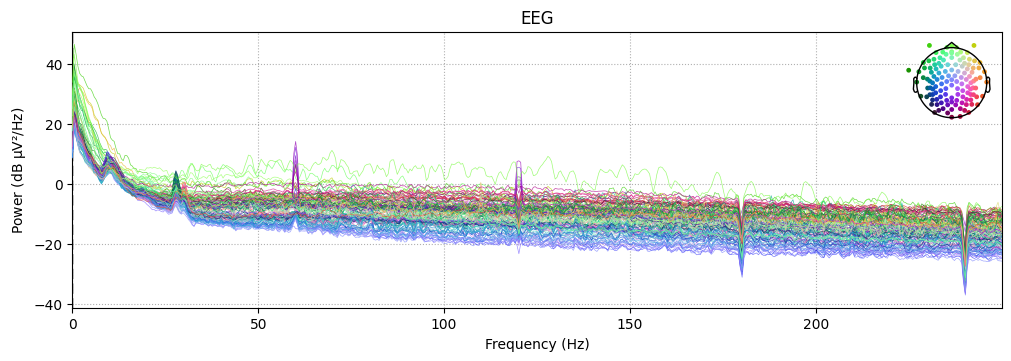

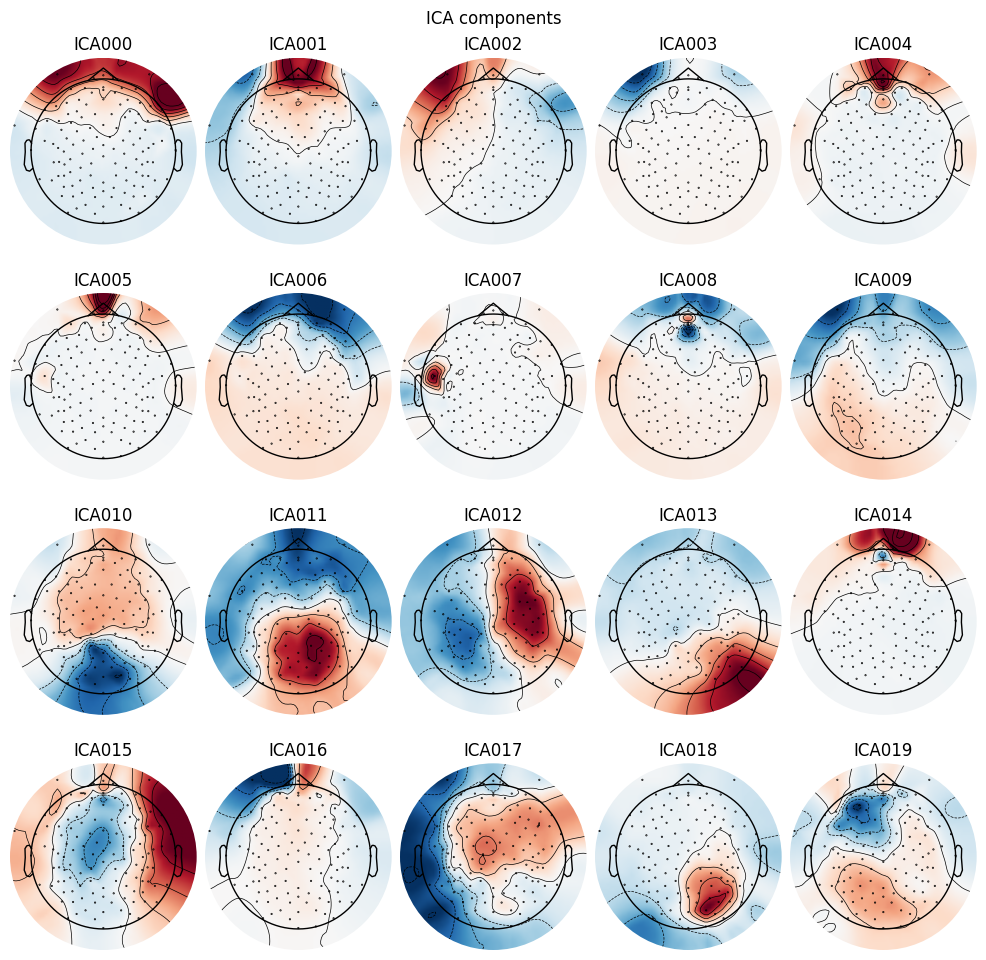

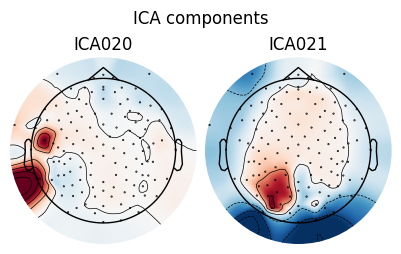

Setting 30816 of 299995 (10.27%) samples to NaN, retaining 269179 (89.73%) samples.
Effective window size : 2.048 (s)
At least one good data span is shorter than n_per_seg, and will be analyzed with a shorter window than the rest of the file.
Applying ICA to Raw instance
    Transforming to ICA space (22 components)
    Zeroing out 1 ICA component
    Projecting back using 125 PCA components
Using EOG channels: E8, E25
EOG channel index for this subject is: [ 7 24]
Omitting 30816 of 299995 (10.27%) samples, retaining 269179 (89.73%) samples.
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel E8 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.7

<Figure size 640x480 with 0 Axes>

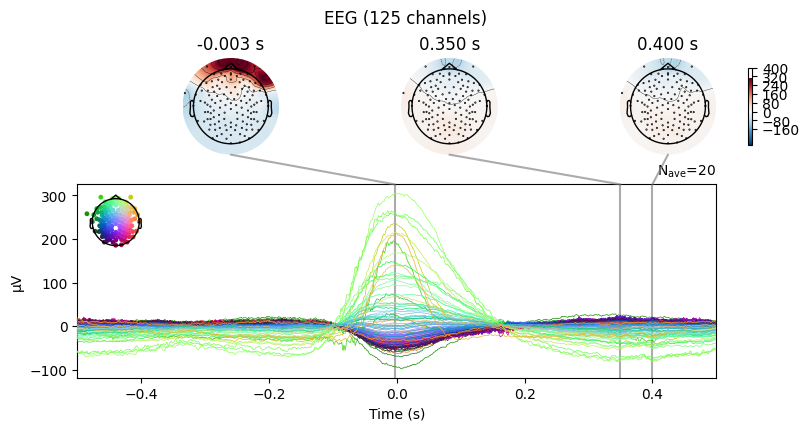

Running EOG SSP computation
Using EOG channels: E8, E25
EOG channel index for this subject is: [ 7 24]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Selecting channel E8 for blink detection
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 10000 samples (10.000 s)

Now detecting blinks and generating corresponding events
Found 107 significant peaks
Number of EOG events detected: 107
Computing projector
Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segmen

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.5s


Not setting metadata
107 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 107 events and 401 original time points ...
71 bad epochs dropped
No channels 'grad' found. Skipping.
No channels 'mag' found. Skipping.
Adding projection: eeg--0.200-0.200-PCA-01 (exp var=94.3%)
Done.


In [4]:
#Compute the eeg vars
[vars, raw_cleaned] = compute_eeg_pipeline(xdf_filename)

In [12]:
fig = raw_cleaned.plot(show_scrollbars=False,
                        show_scalebars=False, events = None, start=0, duration=300, n_channels=75, scalings=10e-5,color='k')
fig.grab().save(f'report_images/{subject}_eeg_annotations.png')

Using pyopengl with version 3.1.7


True

In [6]:
# add an image
from reportlab.lib.units import inch
from reportlab.platypus import Image
image = Image("/Users/bryan.gonzalez/MOBI_QC/src/MOBI_QC/report_images/P5029423_eeg_annotations.png", 7*inch, 3*inch)
image.hAlign = 'CENTER'
story.append(image)

In [7]:
# Build the PDF
doc.build(story)

In [8]:
styles.__dict__

{'byName': {'Normal': <ParagraphStyle 'Normal'>,
  'BodyText': <ParagraphStyle 'BodyText'>,
  'Italic': <ParagraphStyle 'Italic'>,
  'Heading1': <ParagraphStyle 'Heading1'>,
  'Title': <ParagraphStyle 'Title'>,
  'Heading2': <ParagraphStyle 'Heading2'>,
  'Heading3': <ParagraphStyle 'Heading3'>,
  'Heading4': <ParagraphStyle 'Heading4'>,
  'Heading5': <ParagraphStyle 'Heading5'>,
  'Heading6': <ParagraphStyle 'Heading6'>,
  'Bullet': <ParagraphStyle 'Bullet'>,
  'Definition': <ParagraphStyle 'Definition'>,
  'Code': <ParagraphStyle 'Code'>,
  'UnorderedList': <ListStyle 'UnorderedList'>,
  'OrderedList': <ListStyle 'OrderedList'>},
 'byAlias': {'h1': <ParagraphStyle 'Heading1'>,
  'title': <ParagraphStyle 'Title'>,
  'h2': <ParagraphStyle 'Heading2'>,
  'h3': <ParagraphStyle 'Heading3'>,
  'h4': <ParagraphStyle 'Heading4'>,
  'h5': <ParagraphStyle 'Heading5'>,
  'h6': <ParagraphStyle 'Heading6'>,
  'bu': <ParagraphStyle 'Bullet'>,
  'df': <ParagraphStyle 'Definition'>,
  'ul': <ListSty